In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
pd.set_option('future.no_silent_downcasting', True)
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
# Step 1: Load the data
expenses_df = pd.read_csv("C:\\Users\\Berkay\\PycharmProjects\\MedicalCostsRegression\\data\\expenses.csv")

In [3]:
# Step 2: Preview the first few rows of the data
print(expenses_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
# Step 3: Check the shape of the dataset
print(expenses_df.shape)

(1338, 7)


In [5]:
# Step 4: Get basic statistical details of the dataset
print(expenses_df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
# Step 5: One-hot encode categorical variables and replace boolean values with 1 and 0
expenses_df = pd.get_dummies(expenses_df, columns=['sex', 'smoker', 'region'], drop_first=True)
expenses_df = expenses_df.replace({True: 1, False: 0})

In [7]:
# Step 6: Preview the transformed dataset
expenses_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [8]:
# Step 7: Apply log transformation to the 'charges' column for normalization
expenses_df['charges_log'] = np.log(expenses_df['charges'])

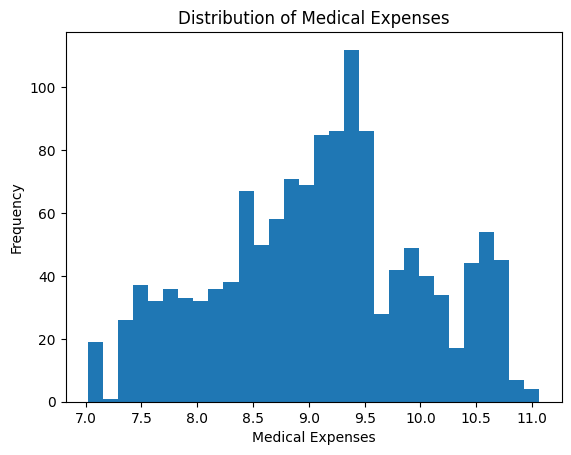

In [9]:
# Step 8: Plot the distribution of log-transformed medical expenses
plt.hist(expenses_df['charges_log'], bins=30)
plt.xlabel('Medical Expenses')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Expenses')
plt.show()

In [10]:
# Step 9: Define the feature set (X) and target variable (y)
X = expenses_df.drop(['charges', 'charges_log'], axis=1) 
y = expenses_df['charges_log'] 

In [11]:
# Step 10: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 11: Create polynomial features for better model complexity
poly_model = PolynomialFeatures(degree=2)  
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly = poly_model.transform(X_test)  

In [13]:
# Step 12: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [14]:
# Step 13: Initialize and train a linear regression model
regressor = LinearRegression()
reg_model = regressor.fit(X_train_scaled, y_train)

In [15]:
# Step 14: Make predictions on the test set
y_pred = reg_model.predict(X_test_poly)

In [16]:
# Step 15: Evaluate the model's performance using R-squared
print("Model Performance (R-squared):", reg_model.score(X_test_scaled, y_test))

Model Performance (R-squared): 0.864493893328991


In [17]:
# Step 16: Print model coefficients and intercept
print("Model Coefficients:", reg_model.coef_)
print("Model Intercept:", reg_model.intercept_)

Model Coefficients: [-3.66683851e-15  7.79013784e-01  2.81995077e-01  4.33278411e-01
 -1.13767526e-01  2.56985864e-01  1.25648200e-02 -2.76621595e-02
 -5.41584811e-02 -2.07543199e-01 -6.22301373e-02 -2.26520311e-01
  1.04775808e-01 -5.39908579e-01  5.60845577e-02  1.44255247e-01
  1.71014198e-01 -2.14350238e-01  3.61742413e-04  5.95772376e-02
  6.37693153e-01 -1.28208695e-01 -1.59834533e-01 -1.24296468e-01
 -7.26451308e-02  4.71235468e-03 -8.91308265e-02 -2.22959092e-03
 -1.46226522e-02 -3.03612282e-02 -1.13767526e-01  3.23529040e-02
  2.94577268e-02  2.26695603e-02  4.41540613e-03  2.56985864e-01
  7.83579893e-03  1.73707096e-02  4.48352499e-02  1.25648200e-02
  0.00000000e+00  0.00000000e+00 -2.76621595e-02  0.00000000e+00
 -5.41584811e-02]
Model Intercept: 9.113322337921884


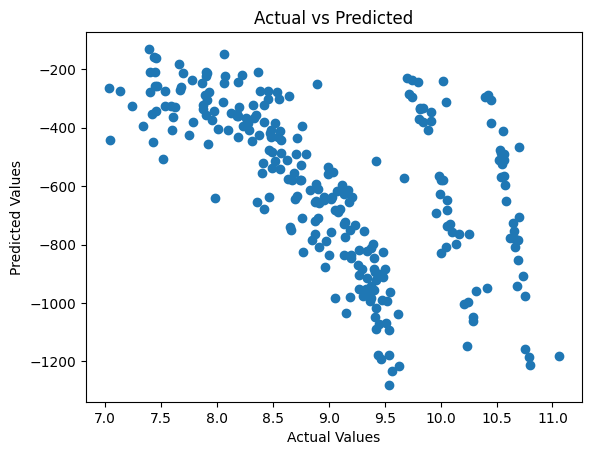

In [18]:
# Step 17: Plot actual vs. predicted values to visualize model performance
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()